# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Notebook generated with AI assistance.**  
Please use caution when interpreting the code or results, and verify key findings independently.

---

This notebook provides an interactive introduction and exploration of [Dandiset 001354](https://dandiarchive.org/dandiset/001354/0.250312.0036):  
*Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation*.

**Purpose:**  
Help researchers quickly understand the dataset's contents, structure, and typical analysis workflow—supporting reanalysis and cross-study comparison.

## Dandiset Overview
- **URL:** [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)
- **Format:** NWB (Neurodata Without Borders) files, one per cell/recording (50 in total)
- **Species:** Mus musculus (mouse)
- **Focus:** Intracellular current clamp recordings from hippocampal CA1 neurons, under programmable/engineered GPCR signaling
- **Data:** CurrentClampSeries and CurrentClampStimulusSeries (voltage response and stimulus per trial/sweep)
- **Resolution:** 20 kHz, sweeps last 5 s, typically ramp current protocol

---

## What This Notebook Covers
- Orientation: Dandiset content, NWB file structure, key metadata
- How to access and list files/assets using the DANDI API
- How to load and stream NWB data from the archive without downloading
- How to extract and visualize sweeps (stimulus/response pairs) for a single cell/recording
- How to summarize and compare data/features across multiple files and cells
- Example visualizations for quick quality control and first-pass inspection

---

## Requirements
To run this notebook, you need the following Python packages (assumed pre-installed):
- dandi
- pynwb
- remfile
- h5py
- numpy
- matplotlib
- pandas

## 1. Using the DANDI API to List and Access Assets

We start by listing NWB files in the Dandiset. Each file corresponds to one cell/recording.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Connect to the DANDI Archive and fetch the dandiset of interest and its assets
dandiset_id = "001354"
dandiset_version = "0.250312.0036"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 10 NWB asset paths and sizes for illustration
assets = dandiset.get_assets_by_glob("*.nwb")
asset_example_list = list(islice(assets, 10))

print("First 10 NWB files in Dandiset 001354:")
for asset in asset_example_list:
    print(f"  {asset.path}  ({round(asset.size / (1024*1024),1)} MB)")

First 10 NWB files in Dandiset 001354:
  sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb  (38.4 MB)
  sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb  (39.3 MB)
  sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb  (36.6 MB)
  sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb  (42.1 MB)
  sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb  (38.0 MB)
  sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb  (22.5 MB)
  sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb  (30.0 MB)
  sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb  (38.1 MB)
  sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07-23

---
## 2. File Structure and Key Metadata

Each NWB file is named to encode subject, session, slice, and cell information.  
Files contain:
- **Stimulus**: Applied current (CurrentClampStimulusSeries), e.g. 'stimulus-01-ch-0'
- **Response**: Recorded voltage (CurrentClampSeries), e.g. 'current_clamp-response-01-ch-0'
- **Metadata:** Session/cell info, targeted layer, and subject

Let's load an example file and print its major metadata and structure.

In [2]:
import pynwb
import h5py
import remfile

example_asset_path = asset_example_list[0].path

# Get download URL for remote streaming
example_asset = next(dandiset.get_assets_by_glob(example_asset_path))
remote_file = remfile.File(example_asset.download_url)
h5_file = h5py.File(remote_file)

# Load using pynwb (streaming, no download)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Display metadata and structure
print("Session description:", nwb.session_description)
print("File identifier    :", nwb.identifier)
print("Session start time :", nwb.session_start_time)
print("Subject ID         :", nwb.subject.subject_id)
print("Sex, Species       :", nwb.subject.sex, nwb.subject.species)
print("Cell ID            :", nwb.lab_meta_data['DandiIcephysMetadata'].cell_id)
print("Targeted layer     :", nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer)
print("----")
print("Number of stimulus series   :", len(nwb.stimulus))
print("Number of response series   :", len(nwb.acquisition))
print("Sample acquisition keys     :", list(nwb.acquisition.keys())[:4])
print("Sample stimulus keys        :", list(nwb.stimulus.keys())[:4])

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Intracellular electrophysiology experiment.
File identifier    : pk2024_07_17_0009
Session start time : 2024-07-17 18:07:19-07:00
Subject ID         : PK-109
Sex, Species       : F Mus musculus
Cell ID            : 2024_07_17_0009
Targeted layer     : CA1
----
Number of stimulus series   : 624
Number of response series   : 624
Sample acquisition keys     : ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1']
Sample stimulus keys        : ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1']


## 3. Visualizing Paired Stimulus and Response Sweeps

In each file, there are many "sweeps" or trials. Each sweep is a stimulus/response pair for a given channel.  
Here, we plot the full duration of the first three sweeps (channel 0) as a paired sequence: the injected current and the cell's membrane voltage response.

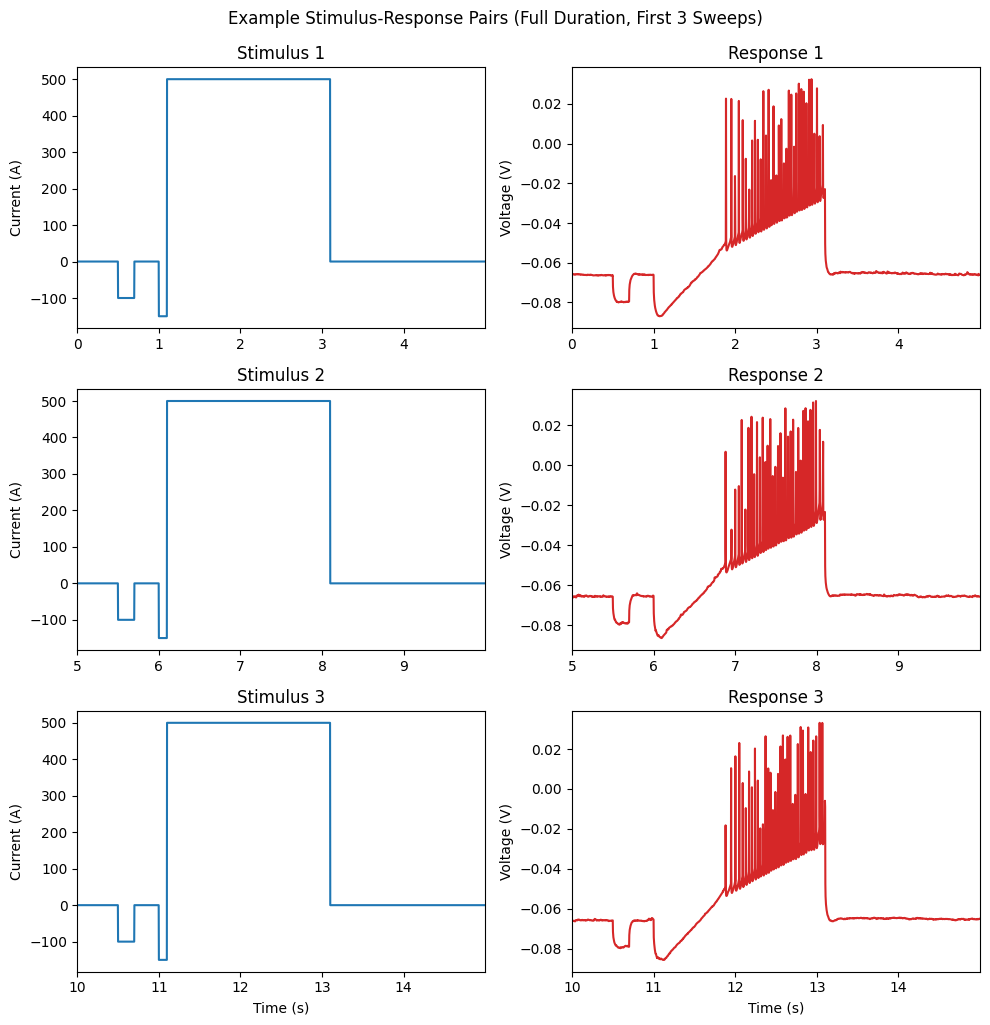

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Pick three sweeps (channel 0)
pairs = []
for i in range(1, 4):
    stim = nwb.stimulus[f'stimulus-0{i}-ch-0']
    resp = nwb.acquisition[f'current_clamp-response-0{i}-ch-0']
    pairs.append((stim, resp))

fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)

for idx, (stim, resp) in enumerate(pairs):
    # Plot the entire sweep (downsample for visibility)
    stim_data = stim.data[:]
    resp_data = resp.data[:]
    stim_time = np.arange(len(stim_data)) / stim.rate + stim.starting_time
    resp_time = np.arange(len(resp_data)) / resp.rate + resp.starting_time
    ds_factor = 50  # Downsample for plotting
    axes[idx,0].plot(stim_time[::ds_factor], stim_data[::ds_factor], color='tab:blue')
    axes[idx,0].set_ylabel('Current (A)')
    axes[idx,0].set_title(f'Stimulus {idx+1}')
    axes[idx,1].plot(resp_time[::ds_factor], resp_data[::ds_factor] * resp.conversion, color='tab:red')
    axes[idx,1].set_ylabel('Voltage (V)')
    axes[idx,1].set_title(f'Response {idx+1}')
    axes[idx,0].set_xlim(stim_time[0], stim_time[-1])
    axes[idx,1].set_xlim(resp_time[0], resp_time[-1])

axes[-1,0].set_xlabel('Time (s)')
axes[-1,1].set_xlabel('Time (s)')
plt.tight_layout()
plt.suptitle('Example Stimulus-Response Pairs (Full Duration, First 3 Sweeps)', y=1.02)
plt.show()

**Interpretation:**  
- The left column shows injected current (per sweep).
- The right column shows the paired membrane voltage trace.
- Ramps and current pulses induce a strong, repetitive spiking response.  
These plots quickly orient the user to what a typical sweep looks like in this dataset.

## 4. File-wide Sweep and Protocol Summary

Sweeps follow a clear organization: each has a stimulus and response for channel 0 and 1.  
Let's summarize the sweep count, protocol type, and sweep durations for this file.

In [4]:
from collections import Counter

stim_keys = list(nwb.stimulus.keys())

# Extract protocol descriptions, durations, and channel info
stim_types = []
stim_durations = []
stim_channels = []
for k in stim_keys:
    stim = nwb.stimulus[k]
    stim_types.append(stim.description)
    stim_durations.append(len(stim.data) / stim.rate)
    if '-ch-1' in k:
        stim_channels.append(1)
    else:
        stim_channels.append(0)

# Summarize
stim_type_counts = Counter(stim_types)
dur_stats = {
    "min": min(stim_durations),
    "max": max(stim_durations),
    "mean": np.mean(stim_durations)
}
print("Sweep/Protocol summary for this file:")
print("  Number of paired sweeps   :", len(stim_keys) // 2)
print("  Protocol types            :", dict(stim_type_counts))
print("  Sweep durations (s)       : min={min:.1f}, max={max:.1f}, mean={mean:.1f}".format(**dur_stats))
print("  Channel labeling (first 8):", stim_channels[:8])

Sweep/Protocol summary for this file:
  Number of paired sweeps   : 312
  Protocol types            : {'Stim type: ramp': 624}
  Sweep durations (s)       : min=5.0, max=5.0, mean=5.0
  Channel labeling (first 8): [0, 1, 0, 1, 0, 1, 0, 1]


*In this example, all sweeps use a 'ramp' protocol and are exactly 5 seconds.*

## 5. Overlaying and Averaging Sweep Responses

Here we quickly visualize the consistency and variability across sweeps by overlaying the first 15 response sweeps for channel 0 and plotting the mean voltage trace.

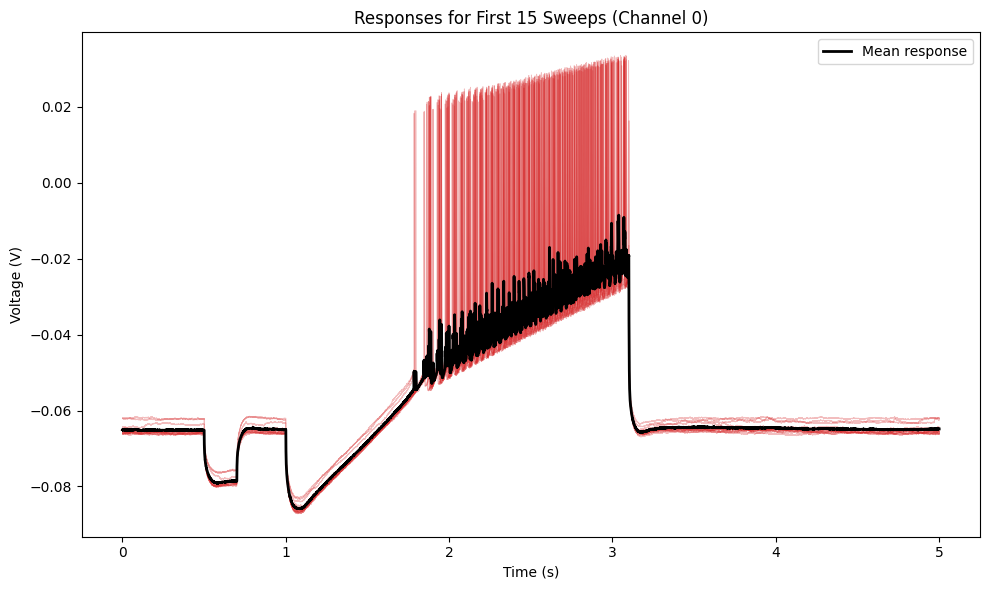

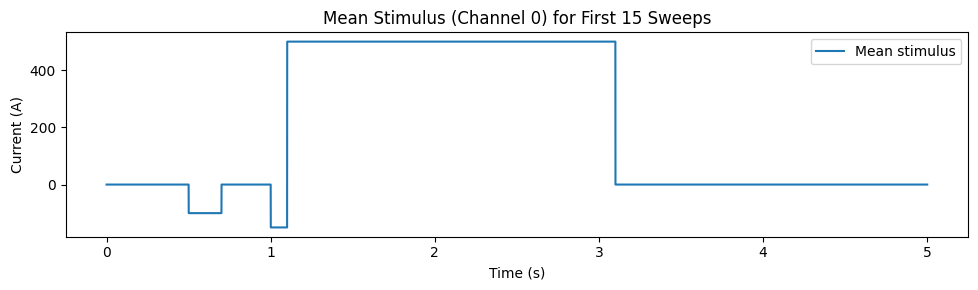

In [5]:
n_sweeps = 15
responses = []
stimuli = []
time = None
for i in range(1, n_sweeps+1):
    stim_key = f'stimulus-{i:02d}-ch-0' if i < 100 else f'stimulus-{i}-ch-0'
    resp_key = f'current_clamp-response-{i:02d}-ch-0' if i < 100 else f'current_clamp-response-{i}-ch-0'
    stim = nwb.stimulus[stim_key]
    resp = nwb.acquisition[resp_key]
    stim_data = stim.data[:]
    resp_data = resp.data[:] * resp.conversion
    stimuli.append(stim_data)
    responses.append(resp_data)
    if time is None:
        time = np.arange(len(stim_data)) / stim.rate + stim.starting_time

responses = np.array(responses)
stimuli = np.array(stimuli)

plt.figure(figsize=(10, 6))
for r in responses:
    plt.plot(time, r, color='tab:red', alpha=0.3, linewidth=0.6)
plt.plot(time, np.mean(responses, axis=0), color='black', label='Mean response', linewidth=2)
plt.title('Responses for First 15 Sweeps (Channel 0)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(time, np.mean(stimuli, axis=0), color='tab:blue', label='Mean stimulus')
plt.title('Mean Stimulus (Channel 0) for First 15 Sweeps')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.tight_layout()
plt.show()

*This overlay shows the shared timing, shape, and trial-to-trial variability in the cell's voltage response to the repeated ramp protocol.*

## 6. Exploring and Summarizing Files Across the Dandiset

For cross-file summaries—such as how many sweeps each file has, or key metadata—we can automate metadata extraction using the DANDI API plus remote streaming of NWB files.

In [6]:
import pandas as pd

# List up to 5 files to keep this illustration quick:
assets = list(islice(dandiset.get_assets_by_glob("*.nwb"), 5))
meta_rows = []
for asset in assets:
    remote_file = remfile.File(asset.download_url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwb_file = io.read()
    row = {
        "path": asset.path,
        "identifier": nwb_file.identifier,
        "cell_id": nwb_file.lab_meta_data["DandiIcephysMetadata"].cell_id,
        "subject_id": nwb_file.subject.subject_id,
        "targeted_layer": nwb_file.lab_meta_data["DandiIcephysMetadata"].targeted_layer,
        "session_start_time": nwb_file.session_start_time,
        "n_sweeps": len(nwb_file.acquisition) // 2
    }
    meta_rows.append(row)
    io.close()

meta_df = pd.DataFrame(meta_rows)
meta_df

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,path,identifier,cell_id,subject_id,targeted_layer,session_start_time,n_sweeps
0,sub-PK-109/sub-PK-109_ses-20240717T180719_slic...,pk2024_07_17_0009,2024_07_17_0009,PK-109,CA1,2024-07-17 18:07:19-07:00,312
1,sub-PK-109/sub-PK-109_ses-20240717T150830_slic...,pk2024_07_17_0001,2024_07_17_0001,PK-109,CA1,2024-07-17 15:08:30-07:00,312
2,sub-PK-109/sub-PK-109_ses-20240717T184616_slic...,pk2024_07_17_0011,2024_07_17_0011,PK-109,CA1,2024-07-17 18:46:16-07:00,312
3,sub-PK-109/sub-PK-109_ses-20240717T164239_slic...,pk2024_07_17_0005,2024_07_17_0005,PK-109,CA1,2024-07-17 16:42:39-07:00,312
4,sub-PK-109/sub-PK-109_ses-20240717T155714_slic...,pk2024_07_17_0003,2024_07_17_0003,PK-109,CA1,2024-07-17 15:57:14-07:00,312


*You can use this dataframe (`meta_df`) to browse recordings, filter by metadata, or select cohorts for batch analysis.*

## 7. Quick Quality Control: Sweep Count Distribution

Here we plot the distribution of sweeps per file (based on the sample, but can be run for all files for complete statistics).

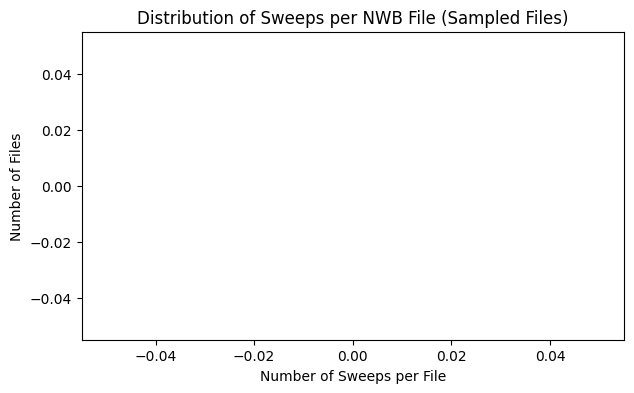

In [7]:
import matplotlib.pyplot as plt

sweep_counts = meta_df["n_sweeps"].values

plt.figure(figsize=(7, 4))
plt.hist(sweep_counts, bins=range(min(sweep_counts), max(sweep_counts) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Number of Sweeps per File')
plt.ylabel('Number of Files')
plt.title('Distribution of Sweeps per NWB File (Sampled Files)')
plt.show()

## 8. Quick Data Quality Check: Baseline Membrane Potential Stability

We'll look at the mean voltage during the pre-stimulus (first 0.5 s) for the first 10 sweeps in one file. Stable baseline suggests good recording quality.

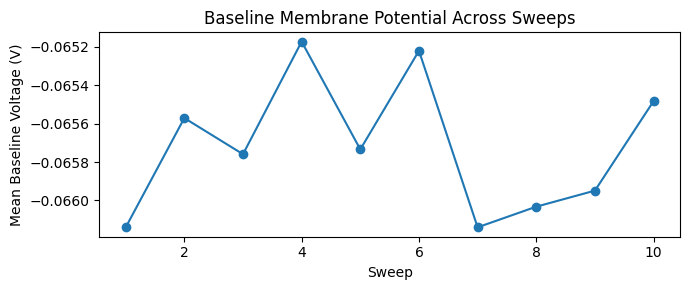

In [8]:
baseline_means = []
n_baseline_points = int(0.5 * 20000)  # 0.5 s at 20 kHz
for i in range(1, 11):
    resp = nwb.acquisition[f'current_clamp-response-{i:02d}-ch-0']
    data = resp.data[:n_baseline_points] * resp.conversion
    baseline_means.append(np.mean(data))

plt.figure(figsize=(7, 3))
plt.plot(range(1, 11), baseline_means, 'o-')
plt.xlabel('Sweep')
plt.ylabel('Mean Baseline Voltage (V)')
plt.title('Baseline Membrane Potential Across Sweeps')
plt.tight_layout()
plt.show()

---
## 9. Conclusions and Next Steps

This notebook introduced and explored Dandiset 001354, covering:
- File access patterns and essential metadata
- Paired stimulus-response visualization
- Protocol and sweep structure
- Overlay/average visualizations for quick insight and QC
- Batch summaries for cross-cell or cross-experiment analysis

**From here, you can extend exploration to:**
- Quantitative analysis of spike patterns or subthreshold features
- Group comparisons, e.g., by targeted layer or experimental manipulation
- Population overlays, outlier detection, and time-resolved summaries

---

*For more details or to access the full dataset, visit the [DANDI project page](https://dandiarchive.org/dandiset/001354/0.250312.0036) or consult the linked protocol publication.*